In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/bitcoin_price.csv',header=None)
df

,0,1,2,3,4,5
0,Price,Close,High,Low,Open,Volume
1,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
2,Date,NaN,NaN,NaN,NaN,NaN
3,2014-09-17,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
4,2014-09-18,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
...,...,...,...,...,...,...
3835,2025-03-15,84343.109375,84672.671875,83639.59375,83968.40625,13650491277
3836,2025-03-16,82579.6875,85051.6015625,82017.90625,84333.3203125,21330270174
3837,2025-03-17,84075.6875,84725.328125,82492.15625,82576.3359375,25092785558
3838,2025-03-18,82718.5,84075.71875,81179.9921875,84075.71875,24095774594


In [ ]:
df= df[[0,1]]
df

,0,1
0,Price,Close
1,Ticker,BTC-USD
2,Date,NaN
3,2014-09-17,457.3340148925781
4,2014-09-18,424.44000244140625
...,...,...
3835,2025-03-15,84343.109375
3836,2025-03-16,82579.6875
3837,2025-03-17,84075.6875
3838,2025-03-18,82718.5


In [ ]:
df = df.drop([0,1,2])

In [ ]:
df.columns = ['date','close']
df

,date,close
3,2014-09-17,457.3340148925781
4,2014-09-18,424.44000244140625
5,2014-09-19,394.7959899902344
6,2014-09-20,408.90399169921875
7,2014-09-21,398.8210144042969
...,...,...
3835,2025-03-15,84343.109375
3836,2025-03-16,82579.6875
3837,2025-03-17,84075.6875
3838,2025-03-18,82718.5


In [ ]:
df["close"] = pd.to_numeric(df["close"], errors="coerce")
df["close"] = df["close"].round().astype(int)
df

,date,close
3,2014-09-17,457
4,2014-09-18,424
5,2014-09-19,395
6,2014-09-20,409
7,2014-09-21,399
...,...,...
3835,2025-03-15,84343
3836,2025-03-16,82580
3837,2025-03-17,84076
3838,2025-03-18,82718


In [ ]:
df.dtypes

,0
date,object
close,int64


In [ ]:
import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

dt = str_to_datetime('2025-01-01')
dt

datetime.datetime(2025, 1, 1, 0, 0)

In [ ]:
df['date'] = df['date'].apply(str_to_datetime)
df

,date,close
3,2014-09-17,457
4,2014-09-18,424
5,2014-09-19,395
6,2014-09-20,409
7,2014-09-21,399
...,...,...
3835,2025-03-15,84343
3836,2025-03-16,82580
3837,2025-03-17,84076
3838,2025-03-18,82718


In [ ]:
df.dtypes

,0
date,datetime64[ns]
close,int64


In [ ]:
df.index = df.pop('date')
df

,close
date,
2014-09-17,457
2014-09-18,424
2014-09-19,395
2014-09-20,409
2014-09-21,399
...,...
2025-03-15,84343
2025-03-16,82580
2025-03-17,84076


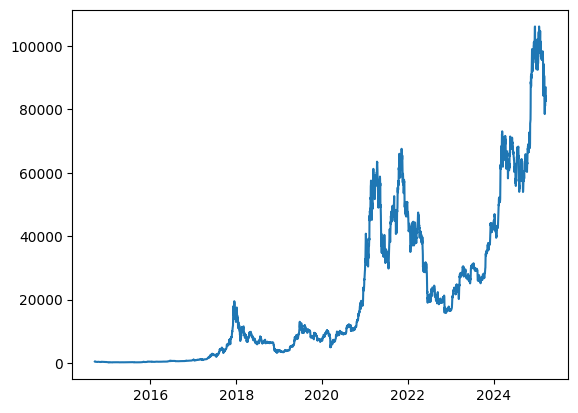

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['close']
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2020-01-01',
                                '2023-12-31',
                                n=3)
windowed_df

<ipython-input-305-0e8fdcbf6041>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, y = values[:-1], values[-1]


,Target Date,Target-3,Target-2,Target-1,Target
0,2020-01-01,7423,7293,7194,7200
1,2020-01-02,7293,7194,7200,6985
2,2020-01-03,7194,7200,6985,7345
3,2020-01-04,7200,6985,7345,7411
4,2020-01-05,6985,7345,7411,7411
...,...,...,...,...,...
1456,2023-12-27,43016,43613,42520,43443
1457,2023-12-28,43613,42520,43443,42628
1458,2023-12-29,42520,43443,42628,42099
1459,2023-12-30,43443,42628,42099,42157


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1461,), (1461, 3, 1), (1461,))

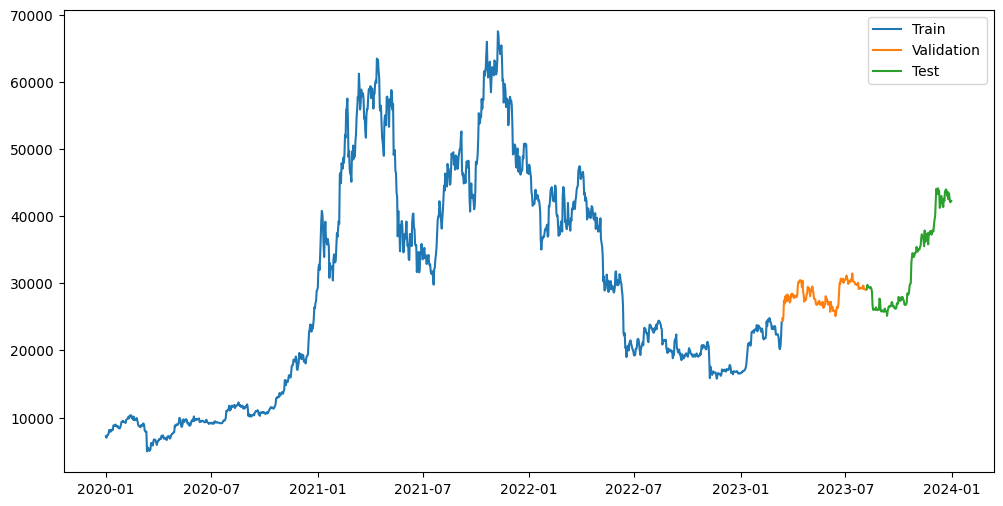

In [ ]:
q_80 = int(len(dates) *.8)
q_90 =int(len(dates) *.9)

train_dates, x_train,y_train = dates[:q_80], X[:q_80], y[:q_80]
val_dates,x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
test_dates, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(12, 6))
plt.plot(train_dates, y_train)
plt.plot(val_dates, y_val)
plt.plot(test_dates, y_test)
plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler


x_scaler = MinMaxScaler()


num_samples, past_days, num_features = x_train.shape
x_train_reshaped = x_train.reshape(-1, num_features)


x_train_scaled = x_scaler.fit_transform(x_train_reshaped).reshape(num_samples, past_days, num_features)
x_val_scaled = x_scaler.transform(x_val.reshape(-1, num_features)).reshape(x_val.shape)
x_test_scaled = x_scaler.transform(x_test.reshape(-1, num_features)).reshape(x_test.shape)


x_train, x_val, x_test = x_train_scaled, x_val_scaled, x_test_scaled

print(x_train.shape, x_val.shape, x_test.shape)

y_scaler = MinMaxScaler()


y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val = y_scaler.transform(y_val.reshape(-1, 1))
y_test = y_scaler.transform(y_test.reshape(-1, 1))


(1168, 3, 1) (146, 3, 1) (147, 3, 1)


In [ ]:
#x_train,y_train

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

model = Sequential([
    layers.Input((3, 1)),
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(32),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mae',
              optimizer=Adam(learning_rate=0.01),
              metrics=['mean_squared_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1398 - mean_squared_error: 0.0453 - val_loss: 28413.9590 - val_mean_squared_error: 809799168.0000
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0412 - mean_squared_error: 0.0034 - val_loss: 28413.8965 - val_mean_squared_error: 809795520.0000
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0405 - mean_squared_error: 0.0034 - val_loss: 28413.9414 - val_mean_squared_error: 809798080.0000
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0407 - mean_squared_error: 0.0033 - val_loss: 28413.8320 - val_mean_squared_error: 809791936.0000
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0428 - mean_squared_error: 0.0036 - val_loss: 28413.8945 - val_mean_squared_error: 809795456.0000
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0338 - mean_squared_error: 0.0022 - val_loss: 28413.8750 - val_mean_squared_error: 809794432.0000
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms

In [ ]:
model.summary()
model.save('model.keras')

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 3, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,373 (368.65 KB)

 Trainable params: 31,457 (122.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,916 (245.77 KB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


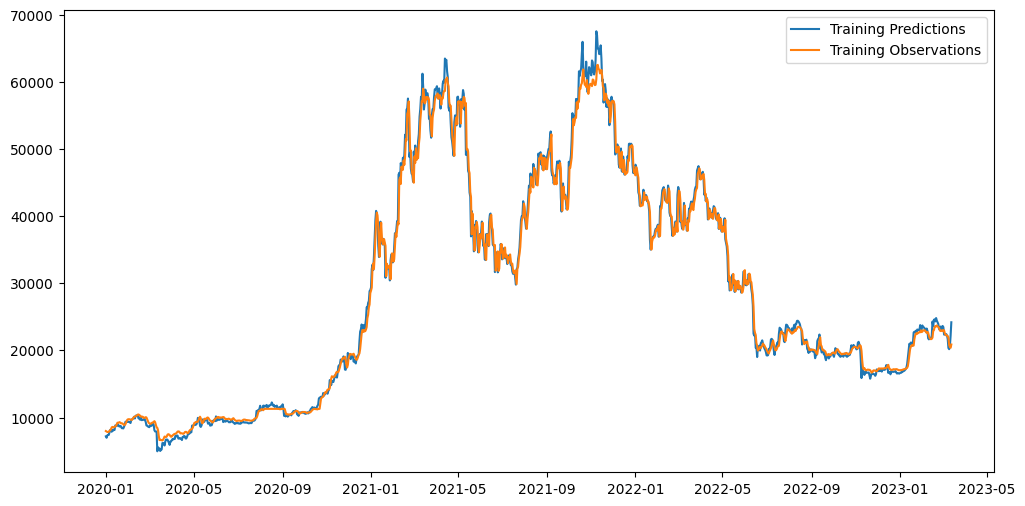

In [ ]:
train_predictions = model.predict(x_train).flatten()
y_pred = y_scaler.inverse_transform(train_predictions.reshape(-1, 1))
train_predictions = y_scaler.inverse_transform(y_train.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(train_dates, train_predictions)
plt.plot(train_dates, y_pred)
plt.legend(['Training Predictions', 'Training Observations'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


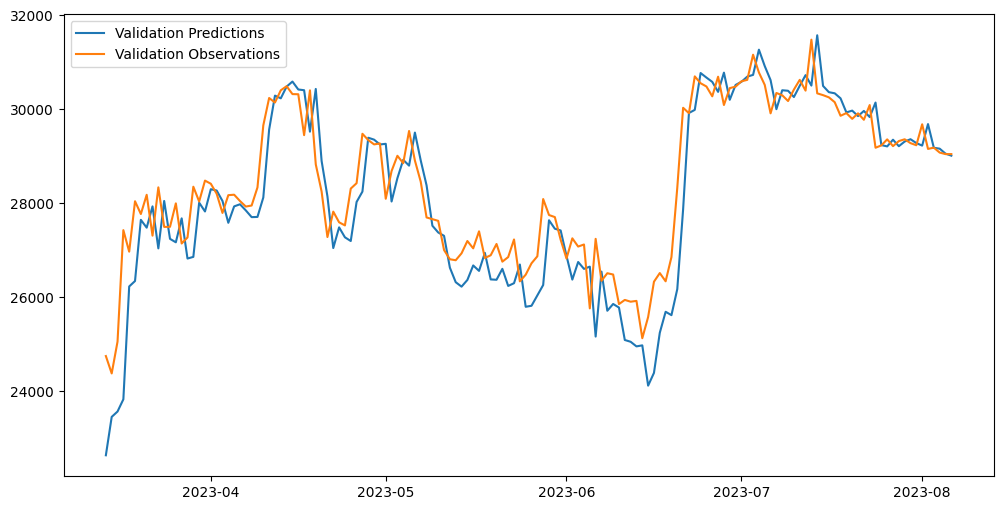

In [ ]:
val_predictions = model.predict(x_val).flatten()
y_val = y_scaler.inverse_transform(y_val.reshape(-1,1))
val_predictions = y_scaler.inverse_transform(val_predictions.reshape(-1, 1))

plt.figure(figsize=(12,6))
plt.plot(val_dates, val_predictions)
plt.plot(val_dates, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[[29181.]
 [29765.]
 [29561.]
 [29430.]
 [29398.]
 [29416.]
 [29283.]
 [29408.]
 [29170.]
 [28702.]
 [26665.]
 [26050.]
 [26096.]
 [26190.]
 [26124.]
 [26032.]
 [26432.]
 [26162.]
 [26048.]
 [26008.]
 [26090.]
 [26106.]
 [27727.]
 [27297.]
 [25931.]
 [25801.]
 [25869.]
 [25970.]
 [25812.]
 [25780.]
 [25753.]
 [26240.]
 [25906.]
 [25896.]
 [25832.]
 [25163.]
 [25833.]
 [26228.]
 [26540.]
 [26609.]
 [26568.]
 [26534.]
 [26754.]
 [27211.]
 [27132.]
 [26568.]
 [26580.]
 [26579.]
 [26257.]
 [26298.]
 [26217.]
 [26353.]
 [27022.]
 [26912.]
 [26968.]
 [27984.]
 [27531.]
 [27430.]
 [27799.]
 [27416.]
 [27947.]
 [27969.]
 [27935.]
 [27584.]
 [27391.]
 [26873.]
 [26757.]
 [26862.]
 [26862.]
 [27160.]
 [28519.]
 [28416.]
 [28328.]
 [28720.]
 [29683.]
 [29918.]
 [29994.]
 [33086.]
 [33902.]
 [34503.]
 [34157.]
 [33910.]
 [34090.]
 [34538.]
 [34502.]
 [34668.]
 [35437.]
 [34938.]
 [34732.]
 [35082.]
 [35049.]
 [35037.]
 [35444.]
 [35655.]
 [36693.]
 [37314.]
 [

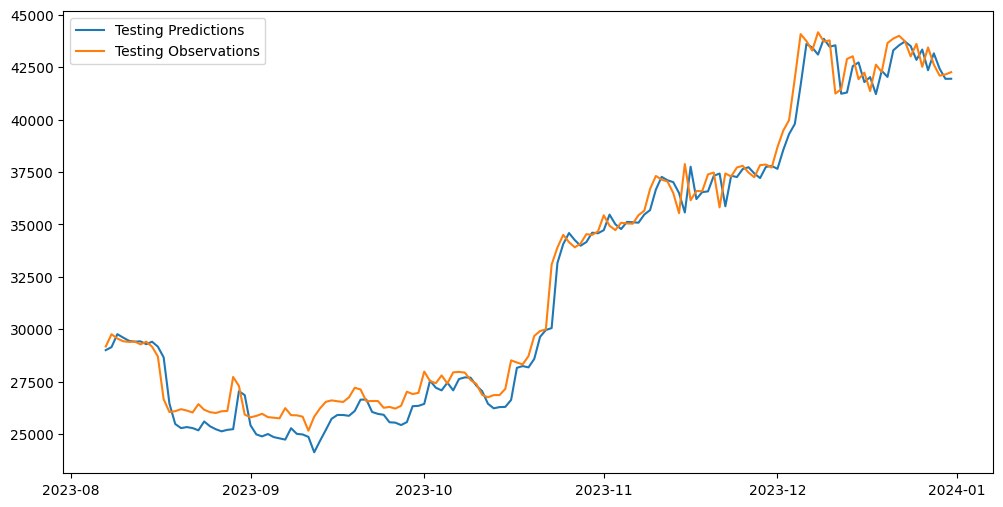

In [ ]:
test_predictions = model.predict(x_test).flatten()

y_test = y_scaler.inverse_transform(y_test.reshape(-1,1))
test_predictions = y_scaler.inverse_transform(test_predictions.reshape(-1, 1))
plt.figure(figsize=(12, 6))
print(y_test,test_predictions)
plt.plot(test_dates, test_predictions)
plt.plot(test_dates, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
y_pred[-1]

array([20883.24], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mea = mean_absolute_error(y_test,test_predictions)
mse = mean_squared_error(y_test,test_predictions)
r2 = r2_score(y_test,test_predictions)
rmse = np.sqrt(mse)
print(f'MAE: {mea}')
print(f'MSE: {mse}')
print(f'R2: {r2}')
print(f"RMSE: {rmse:.4f}")

MAE: 668.3163452148438
MSE: 786112.0
R2: 0.980877161026001
RMSE: 886.6296
